Using TensorFlow backend.


(50000, 28, 28) (50000,)


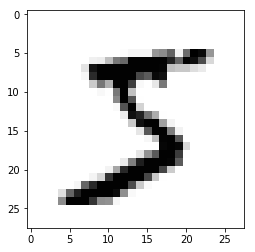

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
! killall tensorboard
import os
os.system("tensorboard --logdir=/tmp/tboard --port=7007 &");

import tensorflow as tf

import numpy as np


In [2]:
X_train.shape

(50000, 28, 28)

In [3]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [4]:
y_input = y_train[:10].copy()
y_foo = y_input.copy()
y_foo[y_input > 2] = 1
y_foo[y_input <= 2] = 0
y_foo


array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=uint8)

In [5]:

binary_y = y_train.copy()
binary_y[y_train > 2] = 1
binary_y[y_train <= 2] = 0
y_binary = binary_y

y_test_binary = y_test.copy()
y_test_binary[y_test > 2] = 1
y_test_binary[y_test <= 2] = 0

In [7]:
import tensorflow as tf

rows = 28
cols = 28
classes = 10

tf.reset_default_graph()
s = tf.InteractiveSession()


with tf.variable_scope("1nn"):
    weights = tf.get_variable("weights", 
#                               initializer=tf.constant(np.zeros((rows * cols, classes), dtype="float32")), 
                              [rows * cols, classes],
                              initializer=tf.random_normal_initializer(mean=0, stddev=1e-3),
                              dtype=tf.float32)
    b = tf.get_variable("bias", [classes],
                    initializer=tf.random_uniform_initializer(minval=0, maxval=1e-3),
                    dtype=tf.float32)

    input_X = tf.placeholder(tf.float32, shape=(None, rows, cols), name="input_X")
    input_y = tf.placeholder(tf.uint8, shape=(None,), name="input_Y")

    one_hot_y = tf.one_hot(input_y, classes)


    flat_X = tf.reshape(input_X, [-1, rows * cols])
    
    predicted_y = tf.nn.softmax(tf.matmul(flat_X, weights) + b)
    class_loss = -tf.log(predicted_y) * one_hot_y - tf.log(1 - predicted_y) * (1 - one_hot_y)
    loss = tf.reduce_mean(class_loss)
    
    foo = tf.argmax(predicted_y, axis=1)
    correct_prediction = tf.equal(tf.cast(input_y, tf.int64), tf.argmax(predicted_y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [8]:
s.run(tf.global_variables_initializer())
print(s.run([weights, b]))

[array([[ -2.02223659e-04,   2.01035436e-04,   2.90568656e-04, ...,
         -8.24955874e-04,  -1.64290110e-03,   1.39344041e-03],
       [ -3.19543295e-04,  -1.26024673e-03,  -3.49159003e-04, ...,
          1.00356422e-03,   6.11066527e-04,  -4.86775418e-04],
       [ -3.05448135e-04,   5.18688285e-05,   5.30206133e-04, ...,
         -1.17782794e-03,   8.73559911e-04,   4.62456490e-04],
       ..., 
       [  2.24147038e-06,   2.28644626e-06,   7.40191608e-05, ...,
          8.80078413e-04,   1.26157154e-03,  -3.79465986e-04],
       [  1.76698784e-03,  -1.31234911e-03,   2.76717947e-06, ...,
          3.73153365e-04,   1.41460635e-03,  -1.69529091e-03],
       [ -9.59472556e-04,  -8.82464752e-04,   1.11868221e-03, ...,
         -1.09826087e-03,  -5.46947063e-04,  -3.54136544e-04]], dtype=float32), array([  6.53185300e-04,   3.82974176e-05,   5.21309266e-04,
         2.63271213e-04,   2.82282243e-04,   9.69984685e-04,
         2.88510328e-05,   5.77259110e-04,   8.86771362e-04,
      

In [9]:
s.run(tf.global_variables_initializer())
class_matmul = tf.matmul(flat_X, weights) + b
s.run([class_matmul, foo],
     {
         input_X: X_train[:3],
         input_y: y_train[:3]
     })

[array([[ 0.00223737, -0.01566412, -0.00753072,  0.00607372, -0.00596026,
          0.00756347, -0.00565941, -0.00357865, -0.01651442,  0.0067644 ],
        [ 0.0112986 , -0.01188873, -0.01043187, -0.00326932,  0.00265878,
          0.0133145 , -0.00626268, -0.01192083, -0.02265258, -0.00531264],
        [ 0.00762132, -0.00632234, -0.01488592,  0.00552318, -0.00483585,
          0.00347506,  0.00525353,  0.00753373,  0.00188663,  0.01605859]], dtype=float32),
 array([5, 5, 9])]

In [10]:
s.run([weights, b, class_matmul, predicted_y, class_loss, one_hot_y, loss, correct_prediction, accuracy],
     {
         input_X: X_train[:3],
         input_y: y_train[:3]
     })

[array([[ -1.27760373e-04,   2.11843802e-03,   6.51115668e-04, ...,
          -2.22769915e-03,  -9.11190233e-04,  -4.47618397e-04],
        [ -1.62251317e-03,  -1.31408882e-03,   9.15183744e-04, ...,
          -3.32057883e-04,  -1.25028810e-03,   1.42556697e-03],
        [ -5.01306262e-04,   6.20716019e-04,  -2.64559552e-04, ...,
          -4.11549932e-04,  -1.71137846e-03,   6.01520624e-05],
        ..., 
        [  1.81510637e-03,   1.25320884e-03,   1.22900575e-03, ...,
          -1.32654200e-03,  -4.73646476e-04,  -1.84165244e-03],
        [ -9.49639129e-04,  -8.60319182e-04,   4.95049644e-05, ...,
          -9.76197043e-05,  -1.52434234e-03,  -4.26261191e-04],
        [  4.67584643e-04,  -9.09489172e-04,   1.40862842e-03, ...,
           1.93611249e-05,   5.62715984e-04,   1.62832078e-03]], dtype=float32),
 array([ 0.00088358,  0.0006529 ,  0.00074833,  0.00031455,  0.00046343,
         0.00022996,  0.00073719,  0.00074062,  0.00065642,  0.00062936], dtype=float32),
 array([[ 0.00

In [11]:
s.run(predicted_y, {input_X: X_train}).shape

(50000, 10)

In [12]:
y_binary.shape

(50000,)

In [13]:
from sklearn.metrics import roc_auc_score
s.run(tf.global_variables_initializer())
for i in range(30):
    s.run(optimizer, {input_X: X_train, input_y: y_train})
    loss_i = s.run(loss,  {input_X: X_train, input_y: y_train})
    print("loss at iter %i:%.4f" % (i, loss_i))
    print("train accuracy:", s.run(accuracy, {input_X:X_train, input_y: y_train}))
    print("test accuracy:", s.run(accuracy, {input_X:X_test, input_y: y_test}))
    print()

loss at iter 0:0.3185
train accuracy: 0.64604
test accuracy: 0.6581

loss at iter 1:0.3122
train accuracy: 0.67856
test accuracy: 0.6879

loss at iter 2:0.3061
train accuracy: 0.69554
test accuracy: 0.7044

loss at iter 3:0.3001
train accuracy: 0.70822
test accuracy: 0.7154

loss at iter 4:0.2943
train accuracy: 0.71644
test accuracy: 0.7242

loss at iter 5:0.2887
train accuracy: 0.72202
test accuracy: 0.731

loss at iter 6:0.2832
train accuracy: 0.72672
test accuracy: 0.7366

loss at iter 7:0.2779
train accuracy: 0.73074
test accuracy: 0.741

loss at iter 8:0.2727
train accuracy: 0.73436
test accuracy: 0.7449

loss at iter 9:0.2677
train accuracy: 0.73722
test accuracy: 0.749

loss at iter 10:0.2628
train accuracy: 0.73984
test accuracy: 0.7528

loss at iter 11:0.2580
train accuracy: 0.74272
test accuracy: 0.7559

loss at iter 12:0.2534
train accuracy: 0.74484
test accuracy: 0.7581

loss at iter 13:0.2490
train accuracy: 0.747
test accuracy: 0.7605

loss at iter 14:0.2447
train accura

In [116]:
with tf.variable_scope("1nn-reshaper"):
    # input shape
    x = tf.placeholder(tf.float32, shape=(None, rows, cols), name="input_X")
    y = tf.placeholder(tf.uint8, shape=(None,), name="input_Y")

    one_hot_y = tf.one_hot(y, 10)
    flat_x = tf.reshape(x, [-1, rows * cols])


In [120]:
X_train_flat, y_train_one_hot = s.run([flat_x, one_hot_y], feed_dict={
    x: X_train,
    y: y_train
})

In [121]:
X_train_flat.shape

(50000, 784)

In [214]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)

import tensorflow as tf

rows = 28
cols = 28
classes = 10

hidden_size = 50

tf.reset_default_graph()
s = tf.InteractiveSession()

with tf.variable_scope("1nn-2layers"):
    # input shape
    input_x = tf.placeholder(tf.float32, shape=(None, rows, cols), name="input_X")
    label_y = tf.placeholder(tf.uint8, shape=(None,), name="input_Y")

    y_ = tf.one_hot(label_y, classes, dtype=tf.float32)
    x = tf.reshape(input_x, [-1, rows * cols])
  
    # input layer
    W1 = tf.get_variable("weights", 
                              [rows * cols, hidden_size],
                              initializer=tf.random_normal_initializer(mean=0, stddev=1e-3),
                              dtype=tf.float32)
    b1 = tf.get_variable("bias", [hidden_size],
                    initializer=tf.random_uniform_initializer(minval=0, maxval=1e-3),
                    dtype=tf.float32)

    y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

    # hidden layer
    W2 = tf.get_variable("hidden_weights", 
                              [hidden_size, classes],
                              initializer=tf.random_normal_initializer(mean=0),
                              dtype=tf.float32)
    b2 = tf.get_variable("hidden_bias", [classes],
                    initializer=tf.random_uniform_initializer(),
                    dtype=tf.float32)

    y2 = tf.nn.softmax(tf.matmul(y1, W2) + b2)

    class_loss = -tf.log(y2) * y_ - tf.log(1 - y2) * (1 - y_)
    loss = tf.reduce_mean(class_loss)

    #output
    y = y2

    loss = tf.reduce_mean(-tf.reduce_sum(tf.cast(y_, tf.float32) * tf.log(y), 
    reduction_indices=[1]))
    
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    s.run(tf.global_variables_initializer())



(50000, 28, 28) (50000,)


In [207]:
s.run(tf.global_variables_initializer())
    
for _ in range(10000):
    _cross, _b1, _ = s.run([loss, accuracy, optimizer], feed_dict={input_x: X_train, label_y: y_train})
    print("Crossentropy: {}, accuracy: {}".format(_cross, _b1))


Crossentropy: 4.201751232147217, accuracy: 0.09684000164270401
Crossentropy: 3.4562249183654785, accuracy: 0.1890999972820282
Crossentropy: 3.3519325256347656, accuracy: 0.19086000323295593
Crossentropy: 2.508392572402954, accuracy: 0.3273800015449524
Crossentropy: 2.1608786582946777, accuracy: 0.4032599925994873
Crossentropy: 2.046713352203369, accuracy: 0.4440799951553345
Crossentropy: 1.4186170101165771, accuracy: 0.5630199909210205
Crossentropy: 1.1858383417129517, accuracy: 0.6604800224304199
Crossentropy: 1.1526906490325928, accuracy: 0.6343399882316589
Crossentropy: 1.1171722412109375, accuracy: 0.6539000272750854
Crossentropy: 1.113371729850769, accuracy: 0.6291800141334534
Crossentropy: 1.080252766609192, accuracy: 0.6585800051689148
Crossentropy: 1.016961932182312, accuracy: 0.6572399735450745
Crossentropy: 0.9394035935401917, accuracy: 0.7142000198364258
Crossentropy: 0.8771420121192932, accuracy: 0.7213799953460693
Crossentropy: 0.8244415521621704, accuracy: 0.7601199746131

KeyboardInterrupt: 

In [102]:
zipped = list(zip(x1, y1))
import random
random.shuffle(zipped)

X_shuffled, y_shuffled = zip(*zipped)

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [218]:

s.run(tf.global_variables_initializer())

for i in range(1000):
    shuffled_inputs = list(zip(X_train, y_train))
    random.shuffle(shuffled_inputs)

    _x_train, _y_train = zip(*shuffled_inputs)
    
    loss_i, accuracy_i, optimizer_i = s.run([
        loss, accuracy, optimizer
    ],  {input_x: _x_train[:100], 
                     label_y: _y_train[:100]})
#     print("loss at iter %i:%.4f" % (i, loss_i))
    print("train accuracy:", accuracy_i)

accuracy_i = s.run([
    accuracy
],  {input_x: X_test, 
     label_y: y_test})

print("test_accuracy:", accuracy_i)

#     print()

train accuracy: 0.07
train accuracy: 0.09
train accuracy: 0.28
train accuracy: 0.33
train accuracy: 0.41
train accuracy: 0.38
train accuracy: 0.55
train accuracy: 0.41
train accuracy: 0.52
train accuracy: 0.66
train accuracy: 0.49
train accuracy: 0.52
train accuracy: 0.62
train accuracy: 0.62
train accuracy: 0.67
train accuracy: 0.62
train accuracy: 0.62
train accuracy: 0.62
train accuracy: 0.76
train accuracy: 0.68
train accuracy: 0.69
train accuracy: 0.71
train accuracy: 0.81
train accuracy: 0.73
train accuracy: 0.73
train accuracy: 0.69
train accuracy: 0.78
train accuracy: 0.73
train accuracy: 0.79
train accuracy: 0.71
train accuracy: 0.79
train accuracy: 0.8
train accuracy: 0.79
train accuracy: 0.86
train accuracy: 0.8
train accuracy: 0.84
train accuracy: 0.78
train accuracy: 0.81
train accuracy: 0.76
train accuracy: 0.8
train accuracy: 0.82
train accuracy: 0.81
train accuracy: 0.73
train accuracy: 0.75
train accuracy: 0.87
train accuracy: 0.8
train accuracy: 0.75
train accuracy: 0

train accuracy: 0.89
train accuracy: 0.89
train accuracy: 0.85
train accuracy: 0.86
train accuracy: 0.87
train accuracy: 0.92
train accuracy: 0.91
train accuracy: 0.92
train accuracy: 0.93
train accuracy: 0.92
train accuracy: 0.85
train accuracy: 0.93
train accuracy: 0.87
train accuracy: 0.91
train accuracy: 0.91
train accuracy: 0.91
train accuracy: 0.93
train accuracy: 0.86
train accuracy: 0.91
train accuracy: 0.9
train accuracy: 0.82
train accuracy: 0.85
train accuracy: 0.95
train accuracy: 0.87
train accuracy: 0.9
train accuracy: 0.89
train accuracy: 0.92
train accuracy: 0.89
train accuracy: 0.88
train accuracy: 0.84
train accuracy: 0.9
train accuracy: 0.86
train accuracy: 0.84
train accuracy: 0.88
train accuracy: 0.87
train accuracy: 0.9
train accuracy: 0.91
train accuracy: 0.89
train accuracy: 0.91
train accuracy: 0.88
train accuracy: 0.88
train accuracy: 0.89
train accuracy: 0.85
train accuracy: 0.89
train accuracy: 0.89
train accuracy: 0.9
train accuracy: 0.94
train accuracy: 0.

train accuracy: 0.93
train accuracy: 0.92
train accuracy: 0.9
train accuracy: 0.86
train accuracy: 0.9
train accuracy: 0.93
train accuracy: 0.92
train accuracy: 0.95
train accuracy: 0.88
train accuracy: 0.94
train accuracy: 0.93
train accuracy: 0.9
train accuracy: 0.91
train accuracy: 0.92
train accuracy: 0.95
train accuracy: 0.89
train accuracy: 0.91
train accuracy: 0.93
train accuracy: 0.92
train accuracy: 0.93
train accuracy: 0.88
train accuracy: 0.89
train accuracy: 0.89
train accuracy: 0.87
train accuracy: 0.92
train accuracy: 0.9
train accuracy: 0.88
train accuracy: 0.94
train accuracy: 0.89
train accuracy: 0.9
train accuracy: 0.9
train accuracy: 0.87
train accuracy: 0.92
train accuracy: 0.88
train accuracy: 0.87
train accuracy: 0.94
train accuracy: 0.87
train accuracy: 0.89
train accuracy: 0.92
train accuracy: 0.91
train accuracy: 0.97
train accuracy: 0.89
train accuracy: 0.94
train accuracy: 0.87
train accuracy: 0.85
train accuracy: 0.93
train accuracy: 0.91
train accuracy: 0.9